# **Instruciton of  pylibs: pre/post-processing**
This document is tutorial for using pylibs with examples. pylibs is a very light libary of python functions/classes that are aimed to speed up the pre/post-processing SCHISM model input/output. Particularly, it has many functions to manipulate information related to SCHISM hgrid. In addition, many other functions are also included for various purposes in dealing with routine work beyond SCHISM model. 

# Install pylibs
  * git clone https://github.com/wzhengui/pylibs <br>
  * add path to PYTHONPATH environmental variable <br>
    * (e.g. on C-Shell: setenv PYTHONPATH 'YourDir/pylibs/Scripts/:YourDir/pylibs/Utility/')
  * install necessary modules (e.g. pyproj, netCDF4)

In [ ]:
#setup only for google drive (perform similar things on your own system)
import os,sys
if not os.path.exists('pylibs'):  
  !git clone https://github.com/wzhengui/pylibs
sys.path.insert(1, "/content/pylibs/Utility"); sys.path.insert(1, "/content/pylibs/Scripts")
%pip install pyproj==3.0.0 netCDF4 pyshp matplotlib mpi4py scipy numpy

#download test files
if not os.path.exists('hgrid.gr3'):
    !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13jfwES8Abn7UzOsNUCDcOyyUEt9VqkXy' -O hgrid.gr3
if not os.path.exists('vgrid.in'):
    !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1XRJOqqLtEJtFf4ltE_K-N8bwimZ191TR' -O vgrid.in
if not os.path.exists('CB.2dm'):
    !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13jfwI_8uIzUS7XXhcdt6EJoMkLST7hNo' -O CB.2dm

#mount google drive (not needed for using pylibs)
# from google.colab import drive
# drive.mount('drive')
# sdir='drive/MyDrive/Python/tutorial_files'
# !ln -sf drive/MyDrive/Python/tutorial_files sdir

--2021-04-15 14:50:35--  https://drive.google.com/uc?export=download&id=1XRJOqqLtEJtFf4ltE_K-N8bwimZ191TR
Resolving drive.google.com (drive.google.com)... 172.217.204.100, 172.217.204.101, 172.217.204.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/edcho7udrh49p0ikg2sffsopb501fqd5/1618498200000/08412886367618097853/*/1XRJOqqLtEJtFf4ltE_K-N8bwimZ191TR?e=download [following]
--2021-04-15 14:50:36--  https://doc-04-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/edcho7udrh49p0ikg2sffsopb501fqd5/1618498200000/08412886367618097853/*/1XRJOqqLtEJtFf4ltE_K-N8bwimZ191TR?e=download
Resolving doc-04-8o-docs.googleusercontent.com (doc-04-8o-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-04-8o-docs.googleusercontent.com (d

# import pylib
* In the beginning of each script, add the following line to import pylibs' functions/classes. <br> 
* pylib automatically import many frequently used modules/functions <br>

  **from pylib import ***

In [ ]:
from pylib import *  #import library

# save and load data:  in python compressed format
* sdata=npz_data(): return a empty class (sdata), and sdata's attributes are used to save data (e.g. array, dicts, strings)
* save_npz(**"fname"**,sdata): save data in python format
* sdata=loadz(**"fname.npz"**): reload data

In [ ]:
#Example 1: save a npz_data
s0=npz_data()
xi=arange(10); yi=xi**2
s0.x=xi; s0.y=yi
save_npz('test',s0)

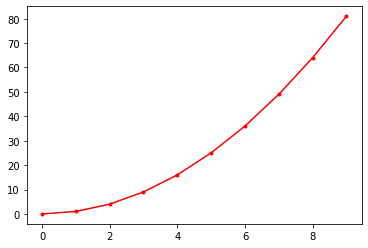

In [ ]:
#load npz data and plot
s=loadz('test.npz')
plot(s.x,s.y,'r.-')

# read and save schism grid
* In order to speed the pre/proc-processing, it is a good idea to save the grid in Python format, though you can read it directly every time.
* **read_schism_hgrid(hgrid_name)**: function to read grid information
* **read_schism_vgrid(vgrid_name)**: function to read vertical grid

In [ ]:
#Example 2. read schism grid
gd=read_schism_hgrid('hgrid.gr3')
vd=read_schism_vgrid('vgrid.in')

#save grid  information for later use
if not os.path.exists('grid.npz'): 
  S=npz_data()  #get a empty data class
  S.hgrid=gd    #save grid information as an attribute of S
  S.vgrid=vd    #save grid information as an attribute of S
  save_npz('grid',S)  #save hgrid first

In [ ]:
#read hgrid
gd=loadz('grid.npz').hgrid  #same as gd=read_schism_hgrid('hgrid.gr3'), but much faster

# list of hgrid attributes 
* **gd.x, gd.y, gd.dp**  : (x,y,z)
* **gd.np, gd.ne, gd.ns, gd.i34, gd.elnode** : grid connectivity 
* **gd.nob, gd.nlb** : # of open(land) bnds <br>
* **gd.iobn, gd.ilbn** : lists of indices of open(land) bnds  <br><br>
* **gd.lon, gd.lat (optional)**: 
  * 1). read lon&lat from hgrid.ll
  * 2). use function **proj** to directly convert (x,y) => (lon,lat) <br>
  e.g. **gd.lon,gd.lat=proj(prj0='epsg:26918',prj1='epsg:4326',x=gd.x,y=gd.y)**

# list of functions for manipulating grid
* **gd.compute_ctr()** : compute element center xyz; return (**gd.xctr, gd.yctr, gd.dpe**)
* **gd.compute_area()** : compute element area; return **gd.area**
* **gd.compute_gradient()** : compute gradient; return **(gd.dpdx,gd.dpdy,gd.dpdxy,gd.dpedx,gd.dpedy,gd.dpedxy)** <br>
* **gd.compute_node_ball()** : compute nodal ball; return **(gd.nne,gd.ine)**
* **gd.compute_acor**: compute area coordiante for pts; return (**ie[npt], ip[npt,3], acor[npt,3]**), see help info

In [ ]:
# gd.compute_acor??

# list of plot functions
* **gd.plot_grid**: plot hgrid <br>
Format: gd.plot_grid(ax=None, method=0, plotz=0, value=None, mask=None, ec='k', fc='None', lw=0.1, levels=None, ticks=None, clim=None, extend='both', cb=True, **args)
  *  plot grid with default color value (grid depth) <br>
    **method=0**: using tricontourf; **method=1**: using PolyCollection (old method) <br>
    **plotz=0**: plot grid only; **plotz=1**: plot depth <br>
    **value**: plot given value (np,or ne dimension) instead of gd.dp <br>
    **mask**: size(ne); only plot elements (mask=True)) <br>
    **ec**: color of grid line <br>
    **fc**: element color <br>
    **lw**: grid line width <br>
    **levels=100**: number of colors for depths;     **levels=array([v1,v2,...])**: contour depths for plot <br>
    **ticks=[v1,v2,...]**: colorbar ticks; **ticks=10**: number of ticks <br>
    **clim=[vmin,vmax]**: value range for plot/colorbar
    **cb=False**: not add colorbar

* **gd.plot_bnd**: plot grid bnd <br>

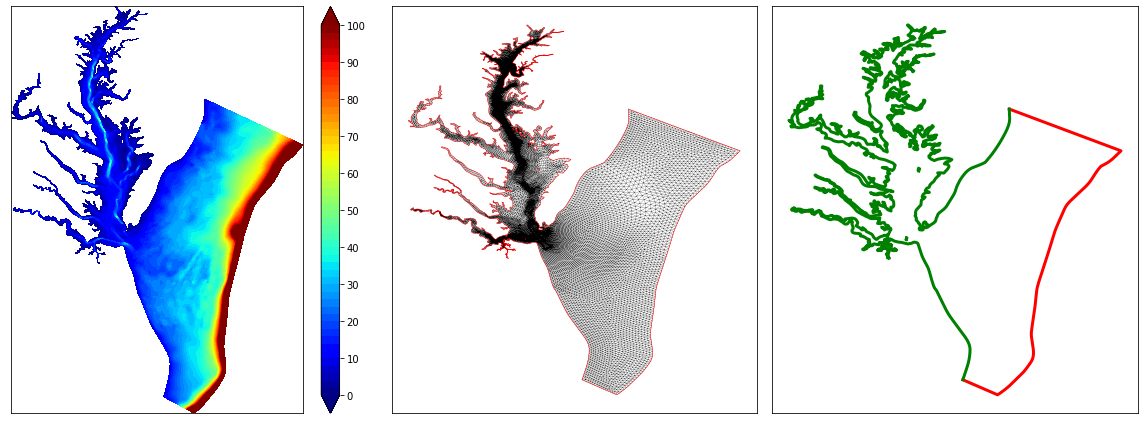

In [ ]:
#Example 3: plot grid in different ways
figure(figsize=[16,6])
subplot(1,3,1)
gd.plot_grid(fmt=1,clim=[0,100],ticks=linspace(0,100,11))
setp(gca(),xticks=[],yticks=[])
set_cmap('jet')

subplot(1,3,2)
gd.plot_grid(); gd.plot_bnd(c='r',lw=0.5)
setp(gca(),xticks=[],yticks=[])

subplot(1,3,3)
gd.plot_bnd(c='rg',lw=3)
setp(gca(),xticks=[],yticks=[])

gcf().tight_layout()


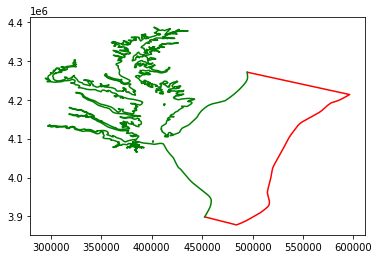

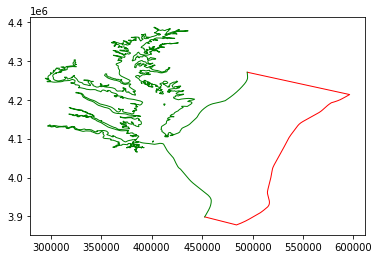

In [ ]:
#Example 4: access bnd information
for i in arange(gd.nob) : #loop open bnds
  sind=gd.iobn[i]         #get bnd indices
  bxi=gd.x[sind]; byi=gd.y[sind]  #get bnd coordinate
  plot(bxi,byi,'r-')              #plot
for i in arange(gd.nlb): #loop land bnd
  sind=gd.ilbn[i]
  bxi=gd.x[sind]; byi=gd.y[sind]
  plot(bxi,byi,'g-')

#The above code is the same as the following
figure(); gd.plot_bnd(c='rg')

In [ ]:
gd.compute_ctr()
gd.np,gd.ne,gd.ns
gd.dpe

#fp=gd.dp>1000; gd.dp[fp]=1000
# gd.write_hgrid('{}/test.gr3'.format(sdir))

array([2.3619146 , 2.30389113, 2.12713334, ..., 9.07893967, 0.50230837,
       0.50047079])

# pre-processing hgrid
  * conversion (2dm => gr3): **sms2gr3**
  * projection (utm <=> ll): **proj**
  * check grid quality: **gd.check_skew_elems, gd.check_quads, gd.split_quads**
  * load bathymetry: (demo on sciclone)

In [ ]:
#Example 5: pre-processing grid

#convert 2dm to gr3
sms2gr3('CB.2dm','CB.gr3')

#convert projection (CB.2dm -> CB.ll)
proj('CB.gr3',0,'epsg:26918','CB.ll',0,'epsg:4326')

#split quads
gdn=read_schism_hgrid('CB.gr3') #read grid information first
gdn.split_quads(angle_min=60, angle_max=120, fname='CB_split.gr3')

# !head -n 10 CB.gr3; head -n 10 CB.ll; head -n 10 CB_split.gr3

cp: target 'sdir' is not a directory


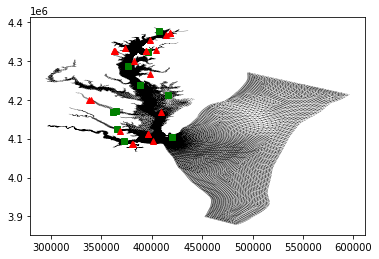

In [ ]:
#Example 6: check grid quality

#identify bad quads. 
gd.check_quads(angle_min=55,angle_max=125,fname='bad_quad.bp')

#identify skew elements
gd.check_skew_elems(angle_min=15,fname='skew_element.bp')

#plot bad quads and skew elements
bp1=read_schism_bpfile('bad_quad.bp')
bp2=read_schism_bpfile('skew_element.bp')

gd.plot_grid()
plot(bp1.x,bp1.y,'gs')
plot(bp2.x,bp2.y,'r^')

# !cp CB.gr3 *.bp sdir  #show the results in local computer

In [ ]:
# !cp bad_quad.bp skew_element.bp sdir
# !ls sdir

# generating *.gr3, *.prop, *.bp files
  * **gd.write_hgrid**: write *.gr3 files
  * **gd.write_prop**: write *.prop file
  * **bp.write_bpfile**: write *.bp where bp=read_schism_bpfile('bpfile')




In [ ]:
#Example 7: for *.gr3 file

#1st: if value is not given, gd.dp is used for default value
gd.write_hgrid('tmp1.gr3')

#2nd: value=constant
gd.write_hgrid('tmp2.gr3',value=0.1) 

#3rd: value is array
vi=arange(gd.np)/gd.np
gd.write_hgrid('tmp3.gr3',value=vi)

#4th: change value in region. 
# vi=ones(gd.np)
# bp=read_schism_bpfile('./sdir/test.reg',fmt=1)
# sind=inside_polygon(c_[gd.x,gd.y],bp.x,bp.y)
# vi[sind==1]=0
# gd.write_hgrid('tmp4.gr3',value=vi)

# !head -n 10 tmp3.gr3

In [ ]:
#Example 8: for *.prop file

#1st: if value is not given, gd.dpe is used for default value
gd.write_prop('tmp1.prop')

#2nd: value=const
gd.write_prop('tmp2.prop',value=5)

#3rd: value=array[gd.ne]
gd.write_prop('tmp3.prop',value=10*ones(gd.ne))

# !head -n 10 tmp2.prop

In [ ]:
#Example 9: for *.bp file

#read *.bp file
bp=read_schism_bpfile('skew_element.bp')

#read *.reg file
# bp=read_schism_bpfile('./sdir/test.reg',fmt=1)

#create a bp file
bp=schism_bpfile()
nrec=10; bp.nsta=nrec; bp.x=arange(nrec); bp.y=arange(nrec)**2; bp.z=ones(nrec)
bp.write_bpfile('tmp1.bp')

In [ ]:
# bp.write_shapefile('test')
# write_shapefile_data??

# List of misc. functions
  * datenum
  * get_xtick
  * find_continuous_sections
  * smooth
  * daytime_length
  * lpfilt
  * inside_polygon
  * proj
  * get_prj_file
  * mfft
  * read_shapefile_data
  * write_shapefile_data,
  * ReadNC
  * WriteNC,
  * harmonic_analysis
  * get_stat
  * get_subplot_position
  * load_bathymetry

# list of sample scripts
  * In pylibs/Scripts, many samples of using pylibs are listed for different purposes.

# submit parallel jobs using pylibs on sciclone/ches
  * Demo1: run_mpi_template.py
  * Demo2: pload_depth.py 

In [ ]:
#small tricks
# !cat skew_element.bp
# !cat bad_quad.bp
# x,y=array([i.split()[1:3] for i in open('bad_quad.bp','r').readlines()[2:]]).astype('float').T
#loadtxt